In [1]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
def pca(X, n_comp):
    
    X = X - np.mean(X, axis = 0)
    cov_mat = np.cov(X.T)
    eigval, eigvec = np.linalg.eig(cov_mat)
    
    sorted_ind = np.argsort(eigval)[::-1]
    sorted_eigval = eigval[sorted_ind]
    sorted_eigvec = eigvec[:, sorted_ind]
    
    top_eigvec = sorted_eigvec[:, :n_comp]
    X_pca = np.dot(X, top_eigvec)
    
    return X_pca, top_eigvec

In [3]:
np.random.seed(0)
X = np.random.randn(100, 4)  

In [9]:
X_pca1, prin_comp1 = pca(X, n_comp = 2)

In [7]:
pca2 = PCA(n_components = 2)
X_pca2 = pca2.fit_transform(X)

In [11]:
print(prin_comp1.T)

[[-0.92849487  0.03858752 -0.27751438 -0.24370893]
 [ 0.17368424 -0.82949171 -0.45197924 -0.27837394]]


In [8]:
print(pca2.components_)

[[-0.92849487  0.03858752 -0.27751438 -0.24370893]
 [-0.17368424  0.82949171  0.45197924  0.27837394]]


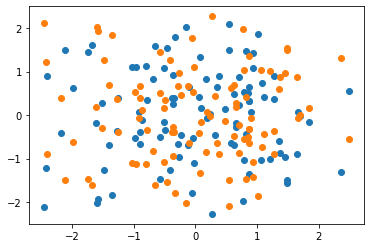

In [13]:
plt.scatter(X_pca1[:, 0], X_pca1[:, 1])
plt.scatter(X_pca2[:, 0], X_pca2[:, 1])

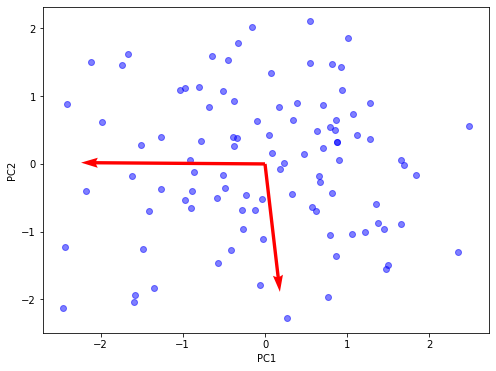

In [23]:
plt.figure(figsize = (8, 6))

plt.scatter(X_pca1[:, 0], X_pca1[:, 1], color = 'b', alpha = 0.5)

for length, vector in zip(prin_comp1.T, prin_comp1.T):
    v = vector * 2.5 * np.sqrt(np.abs(length))
    
    plt.quiver(0, 0, v[0], v[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'r')
    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

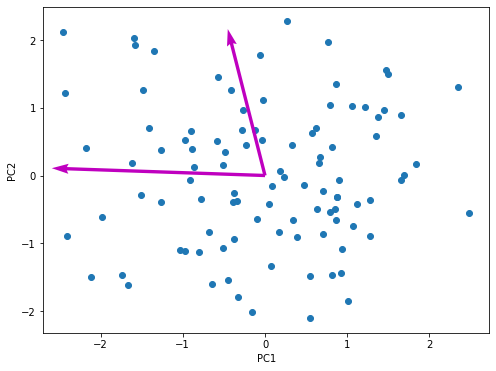

In [22]:
plt.figure(figsize = (8, 6))

plt.scatter(X_pca2[:, 0], X_pca2[:, 1])

for length, vector in zip(pca2.explained_variance_, pca2.components_):
    
    v = vector * 2.5 * np.sqrt(length)
    plt.quiver(0, 0, v[0], v[1], angles = 'xy', scale_units = 'xy', scale = 1, color = 'm')
    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()